In [1]:
import warnings
warnings.filterwarnings("ignore")

### 中文商城评价数据集

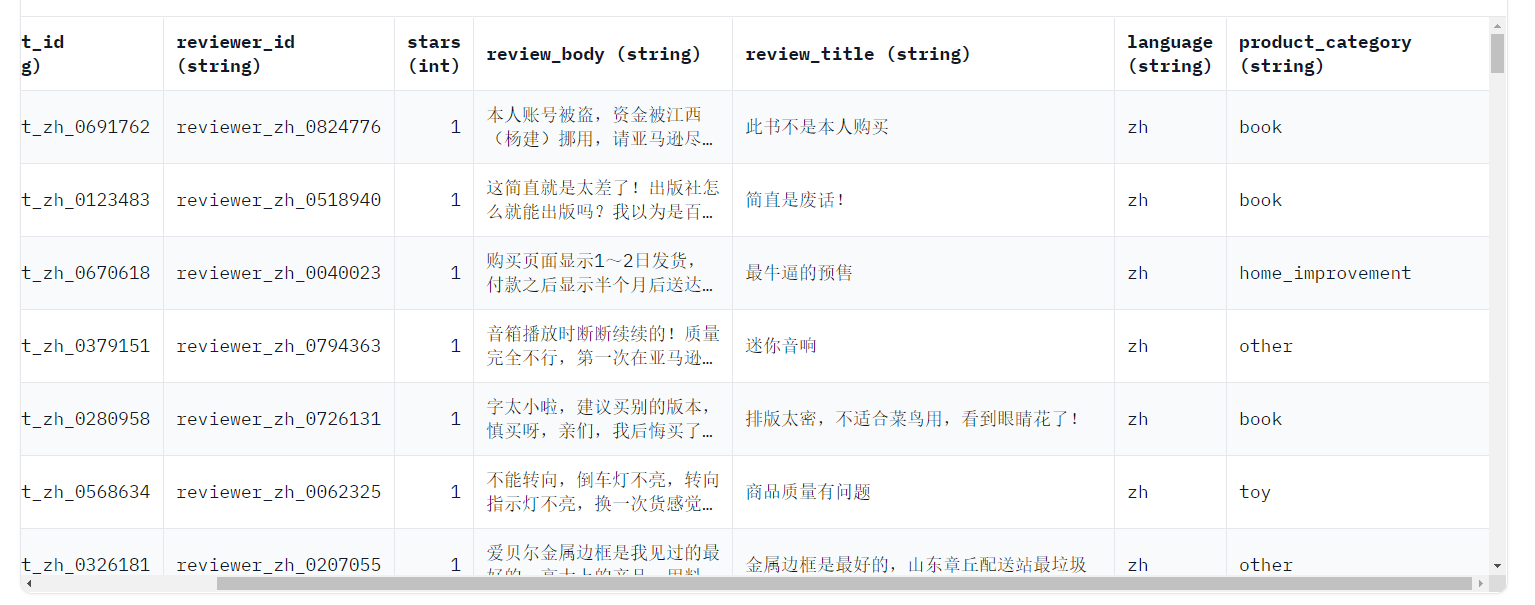

- 这份数据也没咋清洗，咱们只能先将就用了
- 链接：https://huggingface.co/datasets/amazon_reviews_multi/viewer/zh/train

In [2]:
from datasets import load_dataset

chinese_dataset = load_dataset("amazon_reviews_multi", "zh")#它有8种语言，咱们选中文
chinese_dataset

Using the latest cached version of the module from C:\Users\Administrator\.cache\huggingface\modules\datasets_modules\datasets\amazon_reviews_multi\724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609 (last modified on Wed May  4 15:09:38 2022) since it couldn't be found locally at amazon_reviews_multi., or remotely on the Hugging Face Hub.
Reusing dataset amazon_reviews_multi (C:\Users\Administrator\.cache\huggingface\datasets\amazon_reviews_multi\zh\1.0.0\724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609)


A Jupyter Widget

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 200000
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
})

展示几条数据看看

In [3]:
def show_samples(dataset, num_samples=3, seed=40):
    sample = dataset["train"].shuffle(seed=seed).select(range(num_samples))
    for example in sample:
        print(f"\n'>> Title: {example['review_title']}'")
        print(f"'>> Review: {example['review_body']}'")


show_samples(chinese_dataset)

Loading cached shuffled indices for dataset at C:\Users\Administrator\.cache\huggingface\datasets\amazon_reviews_multi\zh\1.0.0\724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609\cache-f59d9516f510622c.arrow



'>> Title: 重修版的结局'
'>> Review: 重修版的结局还是跟原版没什么很大出入...虽然说把原来伏笔用上句式古风可是结局感觉给人有点仓促'

'>> Title: 盗版书！！！'
'>> Review: 这是盗版书，中间翻不开，胶装在一起的，如果想要翻开看全图，书都要撕掉的感觉，装订特别烂，我才翻了几次就有掉页的趋势，后悔后悔'

'>> Title: 一分钱一分货'
'>> Review: 除了便宜真没什么好的，即便4档面包靠里一面还是会胡，设7档有什么意义。'


这回Review就相当于输入数据，Title就是咱们要预测的结果(数据质量很差，凑合用吧)

### 数据种类挺多的，咱们训练次数比较少，就选一个类别的
- 先转换成pandas格式来统计
- 书比较多，数据还算可以，咱们就用书的来玩

In [4]:
chinese_dataset.set_format("pandas")#格式转pnadas，这点用着还挺方便
chinese_df = chinese_dataset["train"][:]#对训练数据统计
# 前20个类别的数量
chinese_df["product_category"].value_counts()[:20]

book                      63058
digital_ebook_purchase    19006
apparel                   11804
shoes                      9877
beauty                     9401
kitchen                    9170
home                       8222
other                      7525
grocery                    7425
wireless                   6432
baby_product               6172
drugstore                  6072
sports                     6015
pc                         4821
toy                        3670
home_improvement           3239
watch                      3133
electronics                3059
luggage                    2984
office_product             2855
Name: product_category, dtype: int64

In [5]:
chinese_df.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,zh_0626061,product_zh_0691762,reviewer_zh_0824776,1,本人账号被盗，资金被江西（杨建）挪用，请亚马逊尽快查实，将本人的200元资金退回。本人已于2...,此书不是本人购买,zh,book
1,zh_0713738,product_zh_0123483,reviewer_zh_0518940,1,这简直就是太差了！出版社怎么就能出版吗？我以为是百度摘录呢！这到底是哪个鱼目混珠的教授啊？！...,简直是废话！,zh,book
2,zh_0621612,product_zh_0670618,reviewer_zh_0040023,1,购买页面显示1～2日发货，付款之后显示半个月后送达，实际收到商品距离下单日期已经一个多月。 ...,最牛逼的预售,zh,home_improvement
3,zh_0757997,product_zh_0379151,reviewer_zh_0794363,1,音箱播放时断断续续的！质量完全不行，第一次在亚马逊买东西，晕！怎么是这样的呀？有客服和我联系吗？,迷你音响,zh,other
4,zh_0086548,product_zh_0280958,reviewer_zh_0726131,1,字太小啦，建议买别的版本，慎买呀，亲们，我后悔买了这个版本！！！,排版太密，不适合菜鸟用，看到眼睛花了！,zh,book


只保留书这个类别

In [6]:
def filter_books(example):#这种方法是huggingface推荐的，感觉我先pnadas处理好也可以
    return (
        example["product_category"] == "book"
    )
chinese_dataset.reset_format()
chinese_dataset = chinese_dataset.filter(filter_books)
show_samples(chinese_dataset)

Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\amazon_reviews_multi\zh\1.0.0\724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609\cache-53c73dccfacc3e93.arrow
Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\amazon_reviews_multi\zh\1.0.0\724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609\cache-6eb85b4b83a78a06.arrow
Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\amazon_reviews_multi\zh\1.0.0\724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609\cache-a79f6146c2aeda96.arrow
Loading cached shuffled indices for dataset at C:\Users\Administrator\.cache\huggingface\datasets\amazon_reviews_multi\zh\1.0.0\724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609\cache-b661d633f6f0184a.arrow



'>> Title: 非常推荐！'
'>> Review: 一本从教育学角度考察慕课发展的书 对理清慕课发展历程非常有帮助！'

'>> Title: 唠叨'
'>> Review: 一个人的碎碎念，就是没地方唠叨了，全跑书里来喋喋不休'

'>> Title: 心碎'
'>> Review: 只有一层塑料袋装着，到的时候皱皱巴巴不成样子，我的地图啊，亚马逊你让我太失望了（还跟那么多书一起买的，包装都没有），心碎'


In [7]:
chinese_dataset

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 63058
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 1563
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 1567
    })
})

### 标签处理
- 过滤掉标签太短的，这样不利于建模
- 我们希望预测出来的结果别就两个字

过滤掉标签太短的，这样不利于建模

In [8]:
books_dataset = chinese_dataset.filter(lambda x: len(x["review_title"]) > 4)

Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\amazon_reviews_multi\zh\1.0.0\724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609\cache-83a16a08ce71d1fb.arrow
Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\amazon_reviews_multi\zh\1.0.0\724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609\cache-5a17482909058668.arrow
Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\amazon_reviews_multi\zh\1.0.0\724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609\cache-242d2f208e99fa6f.arrow


In [9]:
books_dataset

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 36452
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 902
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 904
    })
})

### Tokenizer处理
- 注意需要先pip install sentencepiece这个包（装完之后重启下这个notebook）
- 应该是mt5这个没有fast实现方法，所以需要借助这个包

In [10]:
from transformers import AutoTokenizer

model_checkpoint = "google/mt5-small"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

这个Tokenizer对中文好像处理的一般般，大家也可以在huggingface上多翻翻，很多民间大神版本比这些官方的可能还要好

In [11]:
inputs = tokenizer("我的家在东北松花江上")
inputs

{'input_ids': [259, 35426, 3203, 1083, 107426, 12150, 4366, 6594, 1644, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [12]:
tokenizer.convert_ids_to_tokens(inputs.input_ids)

['▁', '我的', '家', '在', '东北', '松', '花', '江', '上', '</s>']

分别对数据和标签进行tokenizer，长度自己定就可以，但是上限是512

In [13]:
max_input_length = 512
max_target_length = 30


def preprocess_function(examples):
    model_inputs = tokenizer(
        examples["review_body"], max_length=max_input_length, truncation=True
    )
    # 标签处理方法人家也提供了
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            examples["review_title"], max_length=max_target_length, truncation=True
        )

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [14]:
tokenized_datasets = books_dataset.map(preprocess_function, batched=True)

Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\amazon_reviews_multi\zh\1.0.0\724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609\cache-eb6dfe820405e1fc.arrow
Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\amazon_reviews_multi\zh\1.0.0\724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609\cache-9fd5122061ad391b.arrow
Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\amazon_reviews_multi\zh\1.0.0\724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609\cache-cd8ef635cac6a78a.arrow


In [15]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 36452
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 902
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 904
    })
})

### 模型评估方法
- 摘要这东西不太好评估，目前选的方法也是折中来考虑的
- 类似召回率，准确率，F1那东西

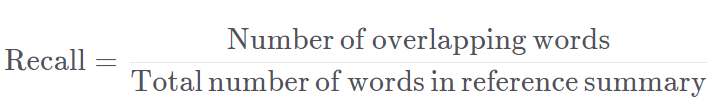

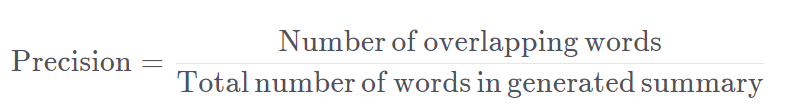

首先装一个评估用的包pip install rouge_score

In [16]:
from datasets import load_metric

rouge_score = load_metric("rouge")#自备梯子

Using the latest cached version of the module from C:\Users\Administrator\.cache\huggingface\modules\datasets_modules\metrics\rouge\0ffdb60f436bdb8884d5e4d608d53dbe108e82dac4f494a66f80ef3f647c104f (last modified on Wed May  4 18:48:58 2022) since it couldn't be found locally at rouge, or remotely on the Hugging Face Hub.


In [17]:
generated_summary = tokenizer("我就瞅你咋地啊")
reference_summary = tokenizer("你瞅我没咋地")

In [18]:
generated_summary

{'input_ids': [259, 155159, 242122, 4235, 191362, 2524, 33332, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

In [19]:
reference_summary

{'input_ids': [259, 4235, 242122, 3003, 15327, 191362, 2524, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

现在计算的是一个粗略版的评估，如果要准一些，还需要去掉一些特殊字符，不同tokenizer不一样得把这个考虑进去实际用的时候

In [20]:
scores = rouge_score.compute(
    predictions=[generated_summary['input_ids'][1:-1]], references=[reference_summary['input_ids'][1:-1]]
)
scores

{'rouge1': AggregateScore(low=Score(precision=0.6666666666666666, recall=0.6666666666666666, fmeasure=0.6666666666666666), mid=Score(precision=0.6666666666666666, recall=0.6666666666666666, fmeasure=0.6666666666666666), high=Score(precision=0.6666666666666666, recall=0.6666666666666666, fmeasure=0.6666666666666666)),
 'rouge2': AggregateScore(low=Score(precision=0.2, recall=0.2, fmeasure=0.20000000000000004), mid=Score(precision=0.2, recall=0.2, fmeasure=0.20000000000000004), high=Score(precision=0.2, recall=0.2, fmeasure=0.20000000000000004)),
 'rougeL': AggregateScore(low=Score(precision=0.5, recall=0.5, fmeasure=0.5), mid=Score(precision=0.5, recall=0.5, fmeasure=0.5), high=Score(precision=0.5, recall=0.5, fmeasure=0.5)),
 'rougeLsum': AggregateScore(low=Score(precision=0.5, recall=0.5, fmeasure=0.5), mid=Score(precision=0.5, recall=0.5, fmeasure=0.5), high=Score(precision=0.5, recall=0.5, fmeasure=0.5))}

有一些没用的信息，整理下

In [21]:
scores = rouge_score.compute(
    predictions=[generated_summary['input_ids'][1:-1]], references=[reference_summary['input_ids'][1:-1]]
)
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
rouge_dict = dict((rn, round(scores[rn].mid.fmeasure * 100, 2)) for rn in rouge_names)
rouge_dict

{'rouge1': 66.67, 'rouge2': 20.0, 'rougeL': 50.0, 'rougeLsum': 50.0}

- rouge1就是咱们上面说的单个词来计算的
- rouge2描述的是词对(俩俩的)
- 参考：https://blog.csdn.net/mch2869253130/article/details/89810974

### 开始建模
- 选好各自的组件即可，核心东西都在huggingface这些包里了

In [23]:
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

MemoryError: 

In [39]:
from transformers import Seq2SeqTrainingArguments

batch_size = 8
num_train_epochs = 1
# 每一个epoch打印
logging_steps = len(tokenized_datasets["train"]) // batch_size
model_name = model_checkpoint.split("/")[-1]

args = Seq2SeqTrainingArguments(
    output_dir=f"{model_name}-finetuned-amazon-en-es",
    evaluation_strategy="epoch",
    learning_rate=5.6e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=1,
    num_train_epochs=num_train_epochs,
    predict_with_generate=True,#评估的时候需要生成的结果
    logging_steps=logging_steps,
    save_strategy='epoch',
)

In [40]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred#没有考虑特殊字符，实际用需根据你的tokenizer筛选剔除这些
    result = rouge_score.compute(
        predictions=predictions, references=labels, use_stemmer=True
    )
    # 返回结果
    result = {key: value.mid.fmeasure * 100 for key, value in result.items()}
    return {k: round(v, 4) for k, v in result.items()}

In [41]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

tokenized_datasets = tokenized_datasets.remove_columns(
    books_dataset["train"].column_names#提取掉没用的列，咱们只保留输入input_ids和标签labels
)

看看时间传给模型的是啥东西

In [42]:
features = [tokenized_datasets["train"][i] for i in range(2)]
data_collator(features)

{'input_ids': tensor([[   259,  63391,  62676,   3916,  55195,    261,  48084,   3916,  27766,
            312,  29500,  10389,    271, 208226,   2151,    261,  20256,   6751,
           6890, 168402, 200163,  18631,  14083,    261,   3661,  63391,    493,
           3464,   4074,  48084,  18558,   3917,    306,  63391,  10293,   5162,
           5624,    848,   1003,    891,   1249,    838, 150845,  18558,  31722,
          38377,    261, 128307,   2811,   4137,    848,   1322,  23971,  15327,
          50679,    291,   6751,   6890, 168402,  17077,  30733,    291,  20256,
          10428,  63391,   8149, 106714, 137270,    306,      1,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,      0],
        [   259,   5144,  40695,   8189,  10170,   8227,  15915,   1322,    309,
         136343,   7427, 123323,  72830,   5674,    291,   3003, 110706,   1543,
          597

### 训练与测试模型

In [43]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [44]:
trainer.train()

***** Running training *****
  Num examples = 36452
  Num Epochs = 1
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 4557
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"
wandb: ERROR Not authenticated.  Copy a key from https://app.wandb.ai/authorize


API Key: ········


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,4.951300,3.161295,24.612000,13.174400,23.337000,24.197300


***** Running Evaluation *****
  Num examples = 902
  Batch size = 8
Saving model checkpoint to mt5-small-finetuned-amazon-en-es\checkpoint-4557
Configuration saved in mt5-small-finetuned-amazon-en-es\checkpoint-4557\config.json
Model weights saved in mt5-small-finetuned-amazon-en-es\checkpoint-4557\pytorch_model.bin
tokenizer config file saved in mt5-small-finetuned-amazon-en-es\checkpoint-4557\tokenizer_config.json
Special tokens file saved in mt5-small-finetuned-amazon-en-es\checkpoint-4557\special_tokens_map.json
Copy vocab file to mt5-small-finetuned-amazon-en-es\checkpoint-4557\spiece.model


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=4557, training_loss=4.950989285712444, metrics={'train_runtime': 15885.0554, 'train_samples_per_second': 2.295, 'train_steps_per_second': 0.287, 'total_flos': 4005361525555200.0, 'train_loss': 4.950989285712444, 'epoch': 1.0})

In [47]:
from transformers import pipeline

summarizer = pipeline("summarization", model='./mt5-small-finetuned-amazon-en-es/checkpoint-4557')

loading configuration file ./mt5-small-finetuned-amazon-en-es/checkpoint-4557\config.json
Model config MT5Config {
  "_name_or_path": "./mt5-small-finetuned-amazon-en-es/checkpoint-4557",
  "architectures": [
    "MT5ForConditionalGeneration"
  ],
  "d_ff": 1024,
  "d_kv": 64,
  "d_model": 512,
  "decoder_start_token_id": 0,
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "gated-gelu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "layer_norm_epsilon": 1e-06,
  "model_type": "mt5",
  "num_decoder_layers": 8,
  "num_heads": 6,
  "num_layers": 8,
  "pad_token_id": 0,
  "relative_attention_num_buckets": 32,
  "tie_word_embeddings": false,
  "tokenizer_class": "T5Tokenizer",
  "torch_dtype": "float32",
  "transformers_version": "4.16.2",
  "use_cache": true,
  "vocab_size": 250112
}

loading configuration file ./mt5-small-finetuned-amazon-en-es/checkpoint-4557\config.json
Model config MT5Config {
  "_name_or_path": "./mt5-small-finetuned-amazon-en-es/check

In [48]:
def print_summary(idx):
    review = books_dataset["test"][idx]["review_body"]
    title = books_dataset["test"][idx]["review_title"]
    summary = summarizer(books_dataset["test"][idx]["review_body"])[0]["summary_text"]
    print(f"'>>> Review: {review}'")
    print(f"\n'>>> Title: {title}'")
    print(f"\n'>>> Summary: {summary}'")

In [63]:
print_summary(50)#50 100 110

'>>> Review: 先付了款，缺了商品，却拒不补发，且客服态度恶劣。建议大家选择货到付款，或者其他渠道购买。'

'>>> Title: 缺商品，客服态度恶劣。'

'>>> Summary: 内容不满意'
